# Machine Learning Bank-Marketing Project

# Abstract: 


### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)response.


# Input variables:

#### Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
21. day - Day of the month

#### Output variable (desired target):
22. response y - has the client subscribed a term deposit? (binary: 'yes','no')

## What is a Term Deposit?


##### A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.








# Tasks to perform:

## Read in the file and get basic information about the data, including numerical summaries.

-	Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

-	Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

-	Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

-	Make a box plot for pdays. Do you see any outliers?


The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.
First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.

-	Convert the response variable to a convenient form

-	Make suitable plots for associations with numerical features and categorical features’


Are the features about the previous campaign data useful?
Are pdays and poutcome associated with the target? 
If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.
Before the predictive modeling part, make sure to perform –

-	The necessary transformations for the categorical variables and the numeric variables

-	Handle variables corresponding to the previous campaign

-	Train test split

### Predictive model 1: Logistic regression

-	Make a predictive model using logistic regression
-	Use RFE to select top n features in an automated fashion (choose n as you see fit)
-	Using p values and VIF, get rid of the redundant features
-	Estimate the model performance using k fold cross validation
-	What is the precision, recall, accuracy of your model?
-	Which features are the most important from your model?


### Predictive model 2: Random Forest

-	Make a predictive model using random forest technique
-	Use not more than 50 trees, and control the depth of the trees to prevent overfitting
-	Estimate the model performance using k fold cross validation
-	What is the precision, recall, accuracy of your model?
-	Using the feature importance values from the Random Forest module, identify the most important features for the model


#### Compare the performance of the Random Forest and the logistic model – 

-	Evaluate both models on the test set
-	Which metric did you choose and why?
-	Which model has better performance on the test set? 
-	Compare the feature importance from the different models – do they agree? Are the top features similar in both models?



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importing data 
bank = pd.read_csv("bank.csv")

In [3]:
#How the data look like
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Some basic information about the data set

In [4]:
#basic idea about data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [5]:
#finding Nulls from the data
bank.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [6]:
#getting more information about data 
bank.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# EDA

In [7]:
#get the columns from dataset
bank.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [8]:
bank.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#How the pdays is
bank['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [10]:
#values greater than 0 in pdays
bank[(bank.pdays>0)].pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

## **missing values don't always have to be present as NULLs!** We can have indicators

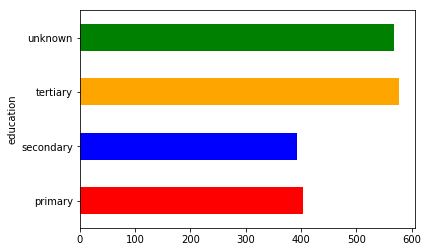

In [11]:
#Education vs Balance
bank.groupby('education')['balance'].median().plot.barh(color=['red','blue','orange','green'])
plt.show()

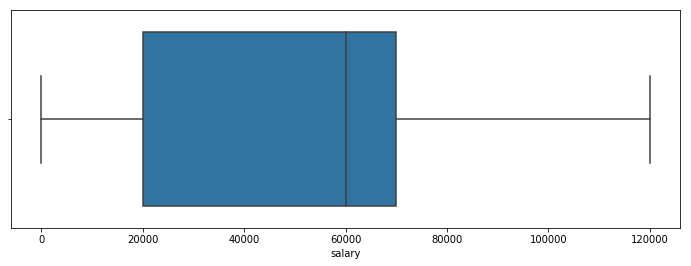

In [12]:
#Boxplot of salary
plt.figure(figsize=[12,4])
sns.boxplot(bank.salary)
plt.show()

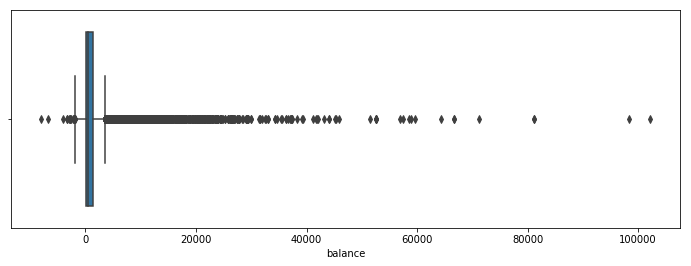

In [13]:
#Boxplot of Salary
plt.figure(figsize=[12,4])
sns.boxplot(bank.balance)
plt.show()

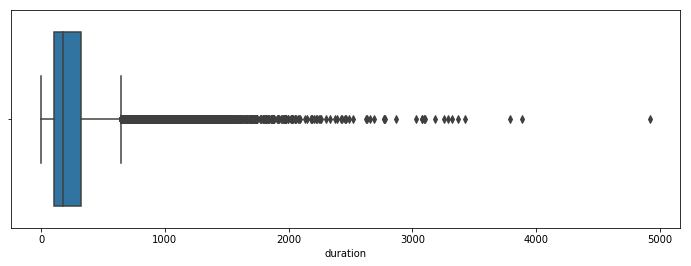

In [14]:
#Boxplot of Duration
plt.figure(figsize=[12,4])
sns.boxplot(bank.duration)
plt.show()

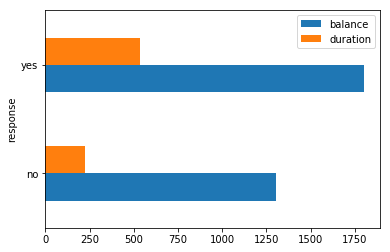

In [15]:
#Responce Vs Balance & Duration
bank.groupby(['response'])['balance','duration'].mean().plot.barh()
plt.show()

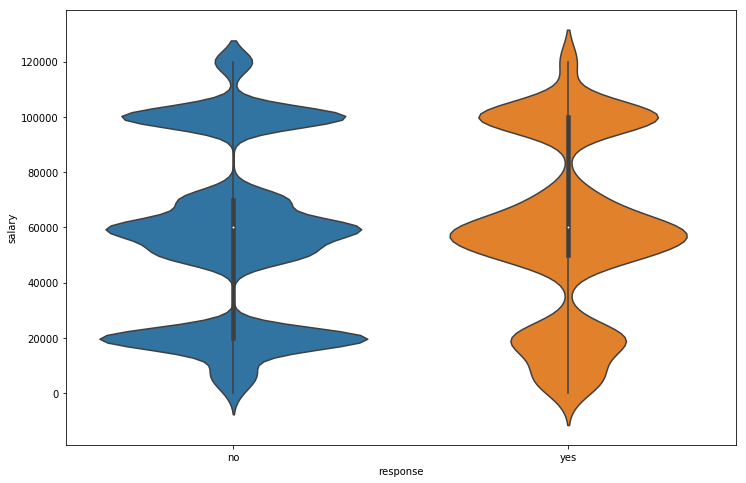

In [16]:
plt.figure(figsize=[12,8])
sns.violinplot(x='response',y = 'salary',data=bank)
plt.show()

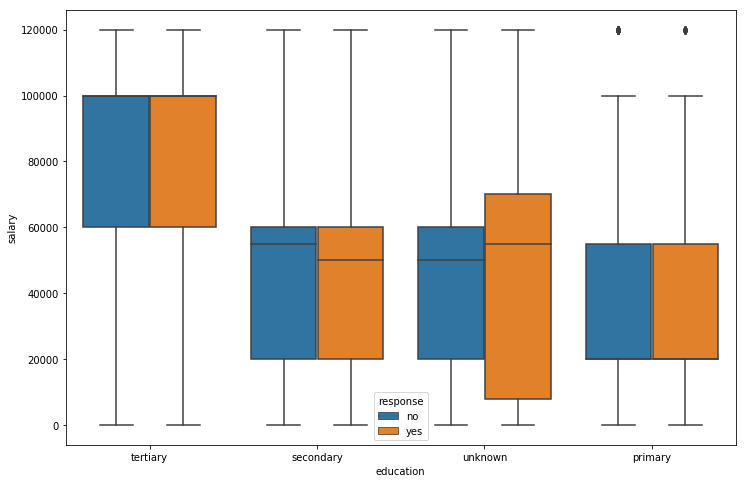

In [17]:
plt.figure(figsize=[12,8])
sns.boxplot(x = 'education',y = 'salary',hue ='response',data = bank)
plt.show()

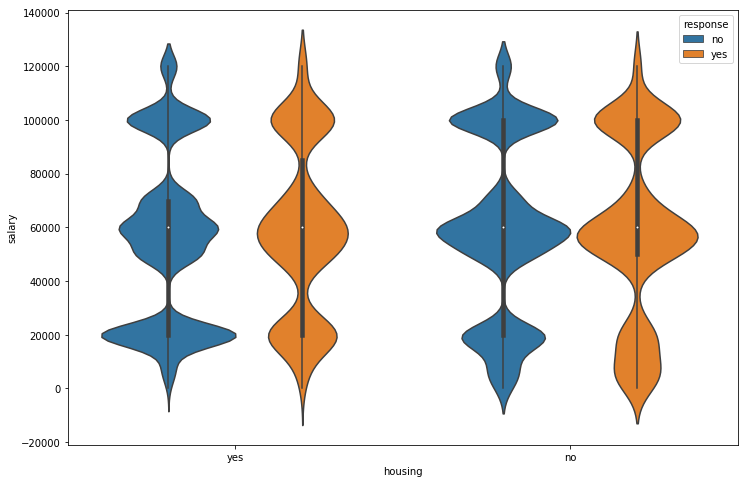

In [18]:
plt.figure(figsize=[12,8])
sns.violinplot(x = 'housing',y='salary' , hue='response',data = bank )
plt.show()

In [19]:
#Whats the shape of the data
bank.shape

(45211, 19)

In [20]:
#Figuring out pdays
bank['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

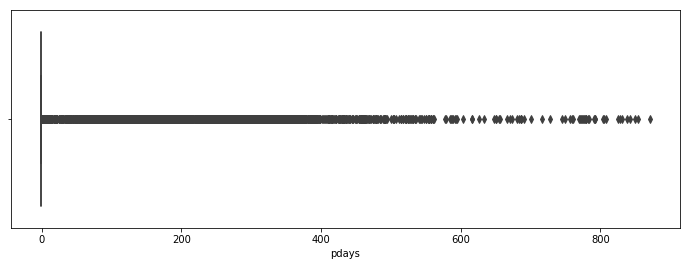

In [21]:
#boxplot of pdays
plt.figure(figsize=[12,4])
sns.boxplot(bank.pdays)
plt.show()

In [22]:
bank.groupby('education')['balance'].mean()

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64

In [23]:
bank.groupby('education')['balance'].median()

education
primary      403
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

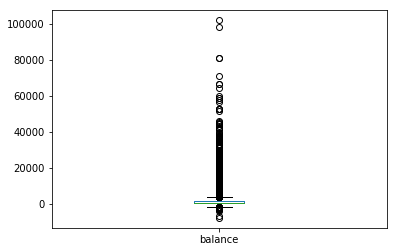

In [24]:
bank.balance.plot.box()
plt.show()

In [25]:
bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [26]:
bank.response.value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [27]:
bank.response.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: response, dtype: float64

## Converting Response variable to a convenient formmat

In [28]:
#Introducing Lebal_Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [29]:
bank['response']=label_encoder.fit_transform(bank['response'])

In [30]:
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Plots

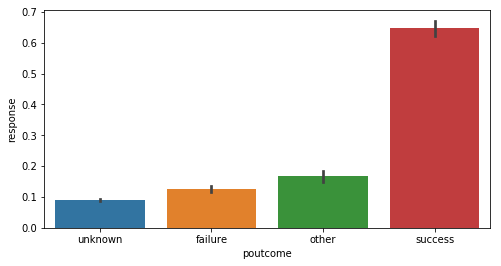

In [31]:
plt.figure(figsize=[8,4])
sns.barplot(x = 'poutcome' ,y='response', data=bank)
plt.show()

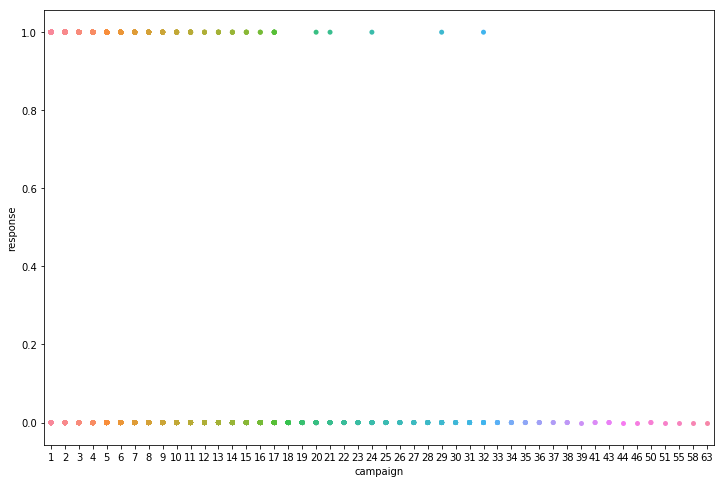

In [32]:
plt.figure(figsize=[12,8])
sns.stripplot(x ='campaign',y='response',data=bank)
plt.show()

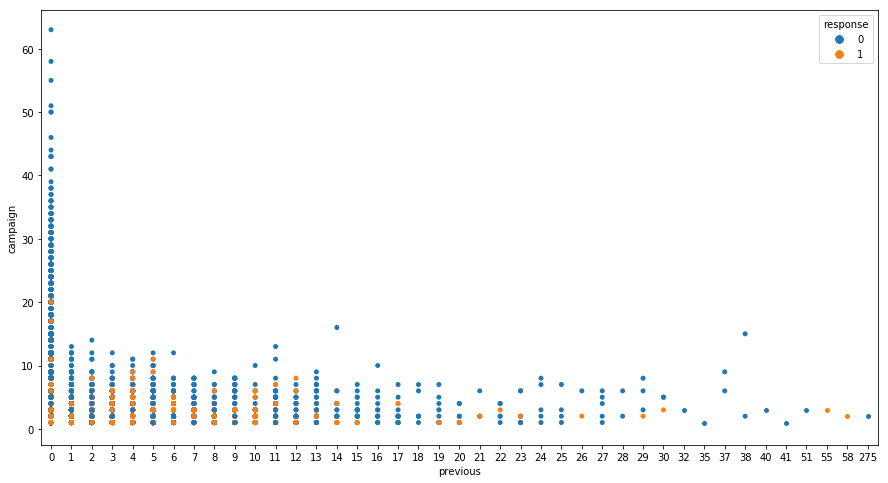

In [33]:
plt.figure(figsize=[15,8])
sns.stripplot(x = 'previous',y='campaign',hue = 'response' ,data=bank)
plt.show()

### Are the features about the previous campaign data useful?
Are pdays and poutcome associated with the target? 
If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

### We want to treat these values as missing
 - ignore these values in our average/median/stat calculations
 - keep it NaN
 
Wherever pdays is -1, replace with NaN

In [34]:
#Replacing pdays of -1 with NaN
bank.loc[bank.pdays<0,"pdays"] = np.NaN

In [35]:
#After replacing by NaN
bank['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

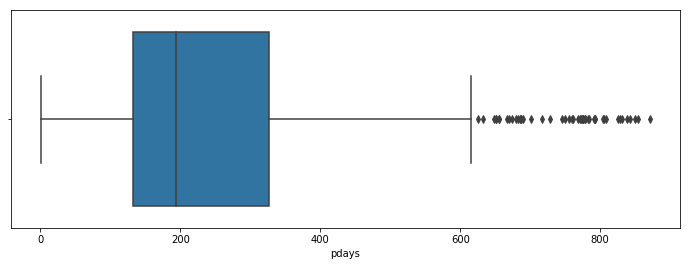

In [36]:
plt.figure(figsize=[12,4])
sns.boxplot(bank.pdays)
plt.show()

## In pdays NaN can be effectively replaced by Mean

In [37]:
#NaN is replaced with mean
bank['pdays'] = bank['pdays'].replace(np.NaN , bank.pdays.mean())

In [38]:
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,224.577692,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,224.577692,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,224.577692,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,224.577692,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,224.577692,0,unknown,0


## The necessary transformations for the categorical variables and the numeric variables

In [39]:
#dropping Job
bank = bank.drop('job',axis=1)
bank.head()

,age,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,224.577692,0,unknown,0
1,44,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,224.577692,0,unknown,0
2,33,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,224.577692,0,unknown,0
3,47,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,224.577692,0,unknown,0
4,33,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,224.577692,0,unknown,0


## Use of label_Encoding

In [40]:
#Using Label_Encoder
bank['targeted'] = label_encoder.fit_transform(bank['targeted'])

bank['default'] = label_encoder.fit_transform(bank['default'])

bank['housing'] = label_encoder.fit_transform(bank['housing'])

bank['loan'] = label_encoder.fit_transform(bank['loan'])

bank = bank.drop('month',axis=1)


training = pd.get_dummies(bank ,columns = ['marital','education','contact','poutcome'])

bank = training

bank = bank.drop('education_unknown',axis=1)

bank = bank.drop('contact_unknown',axis=1)

bank = bank.drop('poutcome_unknown',axis=1)

In [41]:
#After Lable Encoding data looks like
bank.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,58,100000,1,0,2143,1,0,5,261,1,...,1,0,0,0,1,0,0,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,...,0,1,0,1,0,0,0,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,...,1,0,0,1,0,0,0,0,0,0
3,47,20000,0,0,1506,1,0,5,92,1,...,1,0,0,0,0,0,0,0,0,0
4,33,0,0,0,1,0,0,5,198,1,...,0,1,0,0,0,0,0,0,0,0


# Finding Correlation

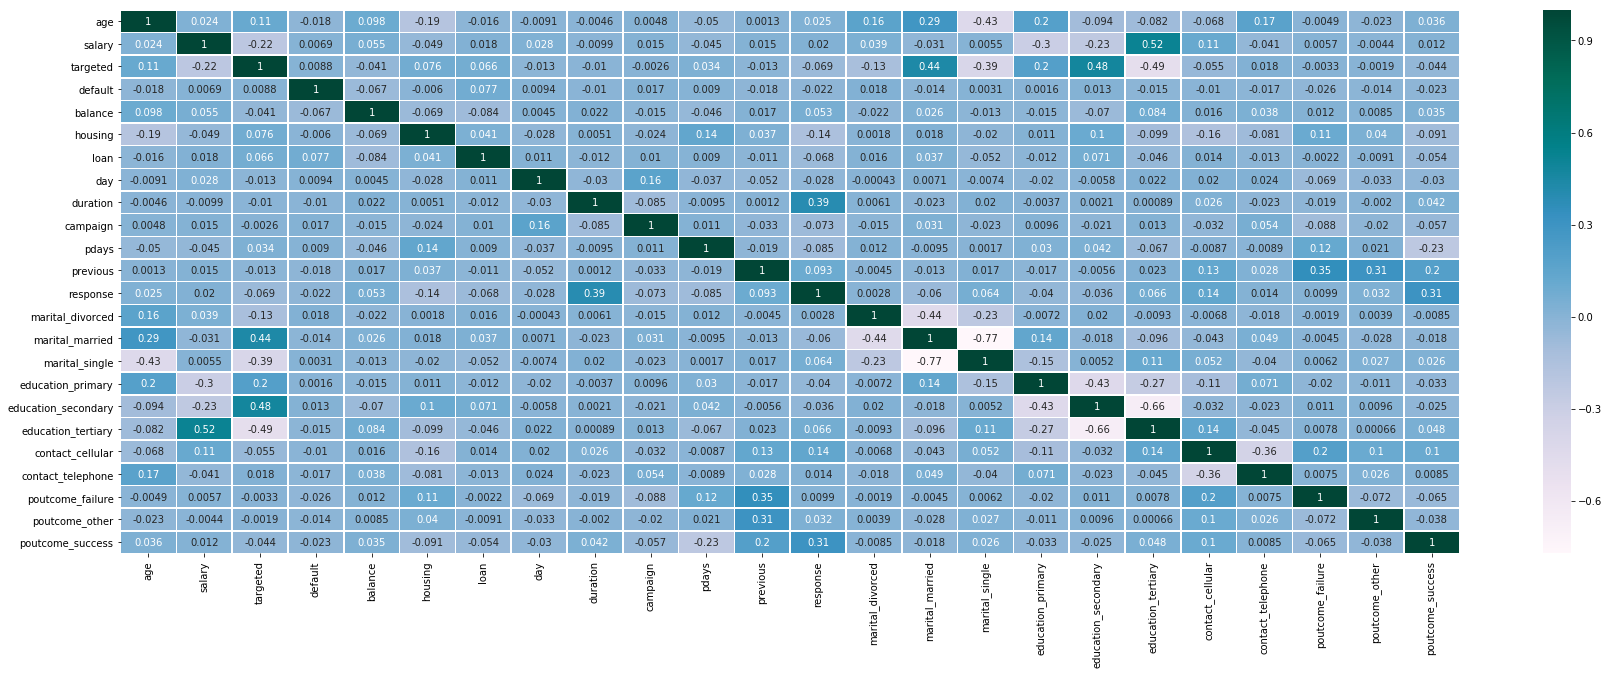

In [47]:
#Heatmap of Correlation
plt.figure(figsize=(30,10))
sns.heatmap(bank.corr(),annot = True,cmap = 'PuBuGn',linewidths=0.5)
plt.show()

# Train-Test split

In [48]:
#getting Columns
bank.columns

Index(['age', 'salary', 'targeted', 'default', 'balance', 'housing', 'loan',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'response',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [49]:
#defining target variable
x2 = bank.drop('response',axis=True)
y2 = bank['response']

In [50]:
#train test split
from sklearn.model_selection import train_test_split

In [51]:
x3_train ,x3_test ,y3_train , y3_test = train_test_split(x2,y2,test_size=0.3,random_state=0)

In [52]:
x3_train.shape , x3_test.shape

((31647, 23), (13564, 23))

In [53]:
y3_train.shape , y3_test.shape

((31647,), (13564,))

# Predictive model 1: Logistic regression

In [54]:
#Initializing the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [55]:
#fiting the model
log_reg.fit(x3_train,y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
log_reg.intercept_ ,log_reg.coef_

(array([-0.00026219]),
 array([[-8.15136729e-03, -1.80721875e-06, -4.74116978e-04,
         -2.44214990e-05,  3.40523154e-05, -8.20537185e-04,
         -2.79838992e-04, -5.92079311e-03,  3.57326120e-03,
         -2.26214837e-03, -1.24227555e-02,  1.20385068e-03,
          4.15481497e-06, -4.59960881e-04,  1.93617535e-04,
         -1.95365129e-04, -3.10123818e-04,  2.38569789e-04,
          4.83181062e-04,  9.37310271e-06, -5.87315412e-05,
         -2.45008106e-05,  4.53362265e-04]]))

In [57]:
y_pred = log_reg.predict(x3_train)
y_pred1 =log_reg.predict(x3_test)

In [58]:
log_reg.score(x3_train, y3_train)

0.8912061174834898

In [59]:
log_reg.score(x3_test,y3_test)

0.8849159539958714

In [60]:
pred_prob = log_reg.predict_proba(x3_train)
pred_prob

array([[0.94193193, 0.05806807],
       [0.94248429, 0.05751571],
       [0.92816656, 0.07183344],
       ...,
       [0.91547541, 0.08452459],
       [0.9270211 , 0.0729789 ],
       [0.93082556, 0.06917444]])

In [61]:
from sklearn.metrics import r2_score
r2_score(y3_train,y_pred)

-0.05522301327557111

In [62]:
import statsmodels.api as sm
x_train_sm1 = sm.add_constant(x3_train)

In [63]:
log_r_sm1 = sm.OLS(y3_train,x_train_sm1).fit()
log_r_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     554.3
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:58:17   Log-Likelihood:                -3792.5
No. Observations:               31647   AIC:                             7631.
Df Residuals:                   31624   BIC:                             7823.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0140      0.011     -1.311      0.190      -0.035       0.007
age                     0.0006      0.000      3.513      0.000       0.000       0.001
salary              -1.713e-07   5.78e-08     -2.962      0.003   -2.85e-07   -5.79e-08
targeted               -0.0076      0.007     -1.106      0.269      -0.021       0.006
default                -0.0148      0.012     -1.269      0.204      -0.038       0.008
balance              2.247e-06   5.01e-07      4.481      0.000    1.26e-06    3.23e-06
housing                -0.0613      0.003    -18.425      0.000      -0.068      -0.055
loan                   -0.0352      0.004     -8.322      0.000      -0.044      -0.027
day                    -0.0003      0.000     -1.755      0.079      -0.001    3.86e-05
duration                0.0005      6e-06     80.160      0.000       0.000       0.000
campaign               -0.0021      0.001     -4.143      0.000      -0.003      -0.001
pdays               -4.879e-05   3.24e-05     -1.504      0.133      -0.000    1.48e-05
previous                0.0011      0.001      1.488      0.137      -0.000       0.003
marital_divorced       -0.0054      0.005     -0.998      0.318      -0.016       0.005
marital_married        -0.0201      0.004     -4.531      0.000      -0.029      -0.011
marital_single          0.0115      0.004      2.846      0.004       0.004       0.019
education_primary      -0.0118      0.011     -1.086      0.277      -0.033       0.010
education_secondary     0.0012      0.011      0.114      0.909      -0.020       0.022
education_tertiary      0.0161      0.009      1.730      0.084      -0.002       0.034
contact_cellular        0.0603      0.004     16.128      0.000       0.053       0.068
contact_telephone       0.0537      0.007      7.783      0.000       0.040       0.067
poutcome_failure        0.0208      0.006      3.699      0.000       0.010       0.032
poutcome_other          0.0431      0.008      5.084      0.000       0.027       0.060
poutcome_success        0.4780      0.009     51.776      0.000       0.460       0.496
==============================================================================
Omnibus:                    10011.137   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35158.333
Skew:                           1.586   Prob(JB):                         0.00
Kurtosis:                       7.075   Cond. No.                     5.76e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.1e-28. This might indicate that there are
strong multicollinearity problems or that the design ma

# Using RFE

In [64]:
#use of RFE
from sklearn.feature_selection import RFE

In [65]:
rfe = RFE(log_reg,20)

In [66]:
rfe.fit(x3_train,y3_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [67]:
feast =x3_train.columns[rfe.support_]
feast

Index(['age', 'targeted', 'default', 'housing', 'loan', 'day', 'duration',
       'campaign', 'previous', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [68]:
x_train_sm2 = sm.add_constant(x3_train[feast])

In [69]:
lor_sm = sm.OLS(y3_train , x_train_sm2).fit()

In [70]:
lor_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:58:35   Log-Likelihood:                -3808.1
No. Observations:               31647   AIC:                             7656.
Df Residuals:                   31627   BIC:                             7823.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0265      0.009     -2.946      0.003      -0.044      -0.009
age                     0.0006      0.000      3.722      0.000       0.000       0.001
targeted               -0.0080      0.007     -1.163      0.245      -0.021       0.005
default                -0.0183      0.012     -1.572      0.116      -0.041       0.005
housing                -0.0627      0.003    -18.920      0.000      -0.069      -0.056
loan                   -0.0371      0.004     -8.785      0.000      -0.045      -0.029
day                    -0.0003      0.000     -1.713      0.087      -0.001    4.64e-05
duration                0.0005      6e-06     80.241      0.000       0.000       0.000
campaign               -0.0022      0.001     -4.273      0.000      -0.003      -0.001
previous                0.0011      0.001      1.483      0.138      -0.000       0.002
marital_divorced       -0.0105      0.005     -2.083      0.037      -0.020      -0.001
marital_married        -0.0239      0.004     -5.959      0.000      -0.032      -0.016
marital_single          0.0079      0.004      2.215      0.027       0.001       0.015
education_primary      -0.0096      0.011     -0.885      0.376      -0.031       0.012
education_secondary     0.0010      0.011      0.098      0.922      -0.020       0.022
education_tertiary      0.0114      0.009      1.260      0.208      -0.006       0.029
contact_cellular        0.0599      0.004     16.015      0.000       0.053       0.067
contact_telephone       0.0545      0.007      7.900      0.000       0.041       0.068
poutcome_failure        0.0206      0.006      3.677      0.000       0.010       0.032
poutcome_other          0.0438      0.008      5.156      0.000       0.027       0.060
poutcome_success        0.4823      0.009     53.354      0.000       0.465       0.500
==============================================================================
Omnibus:                    10037.121   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35295.818
Skew:                           1.590   Prob(JB):                         0.00
Kurtosis:                       7.082   Cond. No.                     1.84e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Using VIF

In [71]:
#use of VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
x3_train.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
24951,58,100000,1,0,1021,0,0,18,205,1,...,1,0,1,0,0,0,0,0,0,0
22129,55,20000,0,0,196,0,0,21,168,2,...,1,0,0,0,0,1,0,0,0,0
986,50,50000,1,0,159,1,0,7,216,2,...,1,0,0,1,0,0,0,0,0,0
14999,43,100000,1,0,1880,1,0,17,63,6,...,1,0,1,0,0,1,0,0,0,0
4027,53,60000,0,0,647,1,0,16,512,6,...,0,0,0,0,1,0,0,0,0,0


In [73]:
variance_inflation_factor(x3_train.values, 10)

1.0883107476976814

In [74]:
[variance_inflation_factor(x3_train.values, ind) for ind in range(11)]

[1.3937902896608285,
 1.4630667731783922,
 2.9577694190596566,
 1.0115462541691198,
 1.0366597949739784,
 1.1628980539879539,
 1.027328661827854,
 1.038787110102835,
 1.0121590446278177,
 1.0508805785537338,
 1.0883107476976814]

In [75]:
vif = pd.DataFrame()
vif['Features'] = x3_train.columns
vif['VIF'] = [variance_inflation_factor(x3_train.values, i) for i in range(x3_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,marital_married,53.26
14,marital_single,23.04
16,education_secondary,11.89
12,marital_divorced,11.62
17,education_tertiary,7.65
15,education_primary,6.46
2,targeted,2.96
1,salary,1.46
0,age,1.39
18,contact_cellular,1.36


In [76]:
import statsmodels.api as sm

In [77]:
x3_train.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
24951,58,100000,1,0,1021,0,0,18,205,1,...,1,0,1,0,0,0,0,0,0,0
22129,55,20000,0,0,196,0,0,21,168,2,...,1,0,0,0,0,1,0,0,0,0
986,50,50000,1,0,159,1,0,7,216,2,...,1,0,0,1,0,0,0,0,0,0
14999,43,100000,1,0,1880,1,0,17,63,6,...,1,0,1,0,0,1,0,0,0,0
4027,53,60000,0,0,647,1,0,16,512,6,...,0,0,0,0,1,0,0,0,0,0


In [78]:
X_train_sm = sm.add_constant(x3_train)
X_train_sm.head()

,const,age,salary,targeted,default,balance,housing,loan,day,duration,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
24951,1.0,58,100000,1,0,1021,0,0,18,205,...,1,0,1,0,0,0,0,0,0,0
22129,1.0,55,20000,0,0,196,0,0,21,168,...,1,0,0,0,0,1,0,0,0,0
986,1.0,50,50000,1,0,159,1,0,7,216,...,1,0,0,1,0,0,0,0,0,0
14999,1.0,43,100000,1,0,1880,1,0,17,63,...,1,0,1,0,0,1,0,0,0,0
4027,1.0,53,60000,0,0,647,1,0,16,512,...,0,0,0,0,1,0,0,0,0,0


In [79]:
log = sm.OLS(y3_train, X_train_sm).fit()

In [80]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     554.3
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:58:55   Log-Likelihood:                -3792.5
No. Observations:               31647   AIC:                             7631.
Df Residuals:                   31624   BIC:                             7823.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0140      0.011     -1.311      0.190      -0.035       0.007
age                     0.0006      0.000      3.513      0.000       0.000       0.001
salary              -1.713e-07   5.78e-08     -2.962      0.003   -2.85e-07   -5.79e-08
targeted               -0.0076      0.007     -1.106      0.269      -0.021       0.006
default                -0.0148      0.012     -1.269      0.204      -0.038       0.008
balance              2.247e-06   5.01e-07      4.481      0.000    1.26e-06    3.23e-06
housing                -0.0613      0.003    -18.425      0.000      -0.068      -0.055
loan                   -0.0352      0.004     -8.322      0.000      -0.044      -0.027
day                    -0.0003      0.000     -1.755      0.079      -0.001    3.86e-05
duration                0.0005      6e-06     80.160      0.000       0.000       0.000
campaign               -0.0021      0.001     -4.143      0.000      -0.003      -0.001
pdays               -4.879e-05   3.24e-05     -1.504      0.133      -0.000    1.48e-05
previous                0.0011      0.001      1.488      0.137      -0.000       0.003
marital_divorced       -0.0054      0.005     -0.998      0.318      -0.016       0.005
marital_married        -0.0201      0.004     -4.531      0.000      -0.029      -0.011
marital_single          0.0115      0.004      2.846      0.004       0.004       0.019
education_primary      -0.0118      0.011     -1.086      0.277      -0.033       0.010
education_secondary     0.0012      0.011      0.114      0.909      -0.020       0.022
education_tertiary      0.0161      0.009      1.730      0.084      -0.002       0.034
contact_cellular        0.0603      0.004     16.128      0.000       0.053       0.068
contact_telephone       0.0537      0.007      7.783      0.000       0.040       0.067
poutcome_failure        0.0208      0.006      3.699      0.000       0.010       0.032
poutcome_other          0.0431      0.008      5.084      0.000       0.027       0.060
poutcome_success        0.4780      0.009     51.776      0.000       0.460       0.496
==============================================================================
Omnibus:                    10011.137   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35158.333
Skew:                           1.586   Prob(JB):                         0.00
Kurtosis:                       7.075   Cond. No.                     5.76e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.1e-28. This might indicate that there are
strong multicollinearity problems or that the design ma

In [81]:
vif = pd.DataFrame()
vif['Features'] = x3_train.columns
vif['VIF'] = [variance_inflation_factor(x3_train.values, i) for i in range(x3_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 10)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,marital_married,53.261073
14,marital_single,23.035534
16,education_secondary,11.891524
12,marital_divorced,11.624664
17,education_tertiary,7.647503
15,education_primary,6.462011
2,targeted,2.957769
1,salary,1.463067
0,age,1.393790
18,contact_cellular,1.356359


In [82]:
X_train_sm = sm.add_constant(x3_train[["duration","default","loan","balance","housing","campaign","day","contact_telephone","previous","age","salary","poutcome_other"]])

In [83]:
log1 = sm.OLS(y3_train, X_train_sm).fit()

In [84]:
log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     645.9
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:59:03   Log-Likelihood:                -5485.5
No. Observations:               31647   AIC:                         1.100e+04
Df Residuals:                   31634   BIC:                         1.111e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0527      0.009      6.110      0.000       0.036       0.070
duration              0.0005   6.32e-06     78.743      0.000       0.000       0.001
default              -0.0312      0.012     -2.544      0.011      -0.055      -0.007
loan                 -0.0469      0.004    -10.561      0.000      -0.056      -0.038
balance            3.183e-06   5.27e-07      6.041      0.000    2.15e-06    4.22e-06
housing              -0.0923      0.003    -27.663      0.000      -0.099      -0.086
campaign             -0.0039      0.001     -7.178      0.000      -0.005      -0.003
day                  -0.0004      0.000     -1.936      0.053      -0.001    4.67e-06
contact_telephone     0.0096      0.007      1.439      0.150      -0.003       0.023
previous              0.0112      0.001     16.177      0.000       0.010       0.013
age                  -0.0001      0.000     -0.914      0.361      -0.000       0.000
salary             1.062e-07   5.07e-08      2.095      0.036    6.82e-09    2.05e-07
poutcome_other        0.0066      0.009      0.768      0.443      -0.010       0.023
==============================================================================
Omnibus:                    10608.856   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36979.765
Skew:                           1.694   Prob(JB):                         0.00
Kurtosis:                       7.071   Cond. No.                     4.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = x3_train[["duration","default","loan","balance","housing","campaign","day","contact_telephone","previous","age","salary","poutcome_other"]].columns
vif['VIF'] = [variance_inflation_factor(x3_train.values, i) for i in range(x3_train[["duration","default","loan","balance","housing","campaign","day","contact_telephone",
                                                                                     "previous","age","salary","poutcome_other"]].shape[1])]
vif['VIF'] = round(vif['VIF'], 10)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loan,2.957769
1,default,1.463067
0,duration,1.393790
11,poutcome_other,1.353916
5,campaign,1.162898
10,salary,1.088311
9,age,1.050881
7,contact_telephone,1.038787
4,housing,1.036660
6,day,1.027329


# K-Fold Cross Validation

In [89]:
#K-fold Cross Validation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10,shuffle=True)
cv_score =[]
i=1
for train_index,test_index in kf.split(x2,y2):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = x2.loc[train_index],x2.loc[test_index]
    ytr,yvl = y2.loc[train_index],y2.loc[test_index]
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(x3_test)[:,1]
    pred_test_full =pred_test
    i+=1    

1 of KFold 10
ROC AUC score: 0.5871300295365661
2 of KFold 10
ROC AUC score: 0.5706863192060586
3 of KFold 10
ROC AUC score: 0.5832906360926011
4 of KFold 10
ROC AUC score: 0.5938128620189339
5 of KFold 10
ROC AUC score: 0.5856935989180629
6 of KFold 10
ROC AUC score: 0.5796919926810141
7 of KFold 10
ROC AUC score: 0.5778132351659842
8 of KFold 10
ROC AUC score: 0.5552993984187657
9 of KFold 10
ROC AUC score: 0.5756607733425263
10 of KFold 10
ROC AUC score: 0.5809991194510232


### k -fold cross validation for logistics regression model gives quite good accuracy.

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix 
print('Confusion matrix_training:\n', confusion_matrix(y3_train, y_pred))
print('Confusion matrix_test:\n', confusion_matrix(y3_test, y_pred1))

Confusion matrix_training:
 [[27481   472]
 [ 2971   723]]
Confusion matrix_test:
 [[11746   223]
 [ 1338   257]]


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y3_train,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94     27953
          1       0.61      0.20      0.30      3694

avg / total       0.87      0.89      0.87     31647



## Predictive model 2: Random Forest

In [106]:
#Initializing the model
from sklearn.ensemble import RandomForestClassifier

In [107]:
rand_for = RandomForestClassifier(n_estimators=100,oob_score=True,max_features=10)

In [108]:
rand_for.fit(x3_train,y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [109]:
rand_for.score(x3_train,y3_train)

0.9999368028565109

In [110]:
rand_for.score(x3_test,y3_test)

0.898849896785609

In [111]:
y_pred_rf = rand_for.predict(x3_train)

In [112]:
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [113]:
y_pred_rf1 = rand_for.predict(x3_test)

In [114]:
y_pred_rf1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
r2_score(y3_train,y_pred_rf)

0.9993870328125033

In [116]:
r2_score(y3_test,y_pred_rf1)

0.025182452788826803

# K-Fold Cross Validation

In [117]:
#K-fold Cross Validation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10,shuffle=True)
cv_score =[]
i=1
for train_index,test_index in kf.split(x2,y2):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = x2.loc[train_index],x2.loc[test_index]
    ytr,yvl = y2.loc[train_index],y2.loc[test_index]
    RF = RandomForestClassifier(n_estimators=100,oob_score=True,max_features=10)
    RF.fit(xtr,ytr)
    score = roc_auc_score(yvl,RF.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = RF.predict(x3_test)
    pred_test_full +=pred_test
    i+=1    

1 of KFold 10
ROC AUC score: 0.663374279279855
2 of KFold 10
ROC AUC score: 0.697206879524991
3 of KFold 10
ROC AUC score: 0.6796201097847869
4 of KFold 10
ROC AUC score: 0.6874320474597589
5 of KFold 10
ROC AUC score: 0.6783107803508719
6 of KFold 10
ROC AUC score: 0.6971343443029727
7 of KFold 10
ROC AUC score: 0.6822167491883578
8 of KFold 10
ROC AUC score: 0.6754636399452969
9 of KFold 10
ROC AUC score: 0.6852343628656177
10 of KFold 10
ROC AUC score: 0.6877467055322767


In [104]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix 
print('Confusion matrix_training:\n', confusion_matrix(y3_train, y_pred_rf))
print('Confusion matrix_test:\n', confusion_matrix(y3_test, y_pred_rf1))

Confusion matrix_training:
 [[27953     0]
 [    1  3693]]
Confusion matrix_test:
 [[11526   443]
 [  917   678]]


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y3_test,y_pred_rf1))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94     11969
          1       0.60      0.43      0.50      1595

avg / total       0.89      0.90      0.89     13564



# Random Forest gives better accuracy than that of the Logistic Regression. So that we can conclude this by saying, Random Forest is the better solution for the given problem. 